<a href="https://colab.research.google.com/github/karahanmerves/Data-mining-approach-for-predicting-fiber-diameter-length-and-ratio-A-case-study-of-BFRC/blob/main/BFRC_BOOSTRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#"Data mining approach for predicting fiber diameter, length, and ratio: A case study of BFRC (Basalt Fiber Reinforced Concrete)"
**WITH MULTIPLE REGRESSION**




##Import to Librarys


In [293]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#% matplotlib inline


##Download Data (format CSV)

In [294]:
dt = pd.read_csv('/content/bfrc.csv')
dt.head()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Fiber capi (mm),Fiber uzunlugu (mm),Fiber orani (%),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.00,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.05,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.10,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.15,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.20,4.74


In [295]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Su (kg/m3)            267 non-null    float64
 1   Cimento (kg/m3)       267 non-null    float64
 2   Ucucu kul (kg/m3)     267 non-null    float64
 3   Mikrosilika (kg/m3)   267 non-null    float64
 4   Kalin agrega (kg/m3)  267 non-null    float64
 5   Ince agrega (kg/m3)   267 non-null    int64  
 6   Su azaltici (kg/m3)   267 non-null    float64
 7   Fiber capi (mm)       267 non-null    float64
 8   Fiber uzunlugu (mm)   267 non-null    int64  
 9   Fiber orani (%)       267 non-null    float64
 10  Cekme dayanimi (MPa)  267 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 23.1 KB


## Checking the Number of Null Values in the Dataset

In [296]:
dt.isnull().sum()

Su (kg/m3)              0
Cimento (kg/m3)         0
Ucucu kul (kg/m3)       0
Mikrosilika (kg/m3)     0
Kalin agrega (kg/m3)    0
Ince agrega (kg/m3)     0
Su azaltici (kg/m3)     0
Fiber capi (mm)         0
Fiber uzunlugu (mm)     0
Fiber orani (%)         0
Cekme dayanimi (MPa)    0
dtype: int64

In [297]:
dt.describe()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Fiber capi (mm),Fiber uzunlugu (mm),Fiber orani (%),Cekme dayanimi (MPa)
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,402.544719,45.717453,16.429213,1079.504644,697.829438,177.606742,3.337865,0.015930,16.749064,0.126592,4.348101
std,73.920000,56.470326,31.284398,161.986898,88.452215,29.875916,2.242625,0.002699,6.376704,0.106337,1.739823
min,217.000000,0.000000,0.000000,512.000000,507.000000,125.000000,0.000000,0.013000,6.000000,0.000000,2.200000
25%,353.500000,0.000000,0.000000,998.000000,633.000000,160.000000,2.400000,0.015000,12.000000,0.050000,3.182500
50%,402.000000,0.000000,0.000000,1125.000000,688.000000,179.000000,4.000000,0.015000,18.000000,0.100000,3.724000
75%,450.000000,86.000000,20.000000,1180.000000,781.000000,188.000000,4.810000,0.015500,20.000000,0.200000,4.885000
max,613.330000,168.000000,126.000000,1540.000000,875.000000,301.000000,8.360000,0.030000,30.000000,0.500000,9.800000


##Correlation Diamgram

<Axes: >

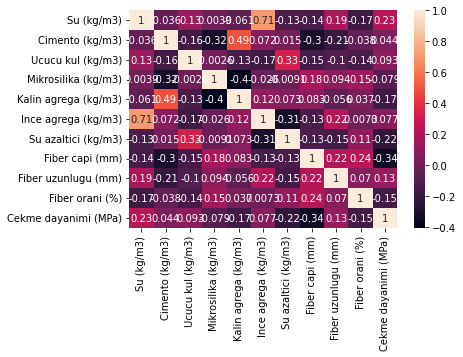

In [298]:
from matplotlib.cm import scale
corr = dt.corr()
sns.heatmap(corr, annot = True)




##Data Visualization





In [299]:
#sns.set(style='white',font_scale=1.2, rc={'figure.figsize':(10,20)})
#ax=dt.hist(bins=20,color='red' )

#Correlations Scatter Plot 

In [300]:
#sns.pairplot(dt, height=3)

# Sample Replication with "Boostrap Method"

In [301]:
bootstrap_sample = dt.sample(n=1000, replace=True)
dt = pd.concat([dt, bootstrap_sample])

In [302]:
dt

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Fiber capi (mm),Fiber uzunlugu (mm),Fiber orani (%),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.020,30,0.00,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.020,30,0.05,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.020,30,0.10,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.020,30,0.15,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.020,30,0.20,4.74
...,...,...,...,...,...,...,...,...,...,...,...
54,350.0,80.0,0.0,1047.0,794.0,170,3.0,0.015,24,0.00,4.50
201,512.0,24.2,118.6,1036.0,710.0,158,5.7,0.015,20,0.16,3.45
43,330.0,0.0,0.0,1300.0,671.0,152,0.0,0.015,12,0.05,3.45
37,340.0,0.0,0.0,1540.0,610.0,153,2.9,0.016,22,0.00,4.31


##Correlation Diagram After Boostrap

<Axes: >

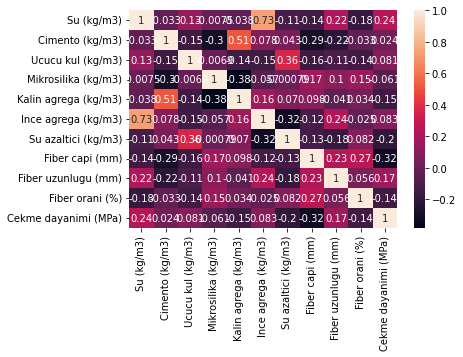

In [303]:
from matplotlib.cm import scale
corr = dt.corr()
sns.heatmap(corr, annot = True)

#Target Feature Separation

In [304]:
X = dt.drop(['Fiber orani (%)','Fiber capi (mm)','Fiber uzunlugu (mm)'], axis = 1)
y1=dt['Fiber capi (mm)']
y2=dt['Fiber orani (%)']
y3=dt['Fiber uzunlugu (mm)']

In [305]:
X

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.74
...,...,...,...,...,...,...,...,...
54,350.0,80.0,0.0,1047.0,794.0,170,3.0,4.50
201,512.0,24.2,118.6,1036.0,710.0,158,5.7,3.45
43,330.0,0.0,0.0,1300.0,671.0,152,0.0,3.45
37,340.0,0.0,0.0,1540.0,610.0,153,2.9,4.31


# Feature Shape Control

In [306]:
y1.shape,X.shape

((1267,), (1267, 8))

In [307]:
y2.shape,X.shape

((1267,), (1267, 8))

In [308]:
y3.shape,X.shape

((1267,), (1267, 8))

#Feature Visualization 

First 5 lines for feature 'Stress' and 'max diameter' 

In [309]:
X.head()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.74


#Split

Train Test Split for 'Stress'

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

#Normalization Scaler

In [311]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [312]:
X_train.shape

(1013, 8)


# MultiOutput Regressor for Using Gradient Boosting Regressor



In [313]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression as lr

In [314]:
from sklearn.ensemble import GradientBoostingRegressor
mor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

In [315]:
#rf = RandomForestRegressor(n_estimators = 400, random_state =0)
#mor = MultiOutputRegressor(rf)

In [316]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.005,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model = GradientBoostingRegressor(**params)



# Modeli eğitme

mor = MultiOutputRegressor(gb_model)
mor.fit(X_train, np.column_stack((y1_train, y2_train,y3_train)))


MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.005,
                                                         max_depth=5,
                                                         min_samples_split=6,
                                                         n_estimators=500))

##Predictiving to Target Features

In [317]:
y_pred = mor.predict(X_test)

In [318]:
y1_pred, y2_pred,y3_pred = y_pred[:, 0], y_pred[:, 1],y_pred[:,2]

##Mean Square Error (MSE)

In [319]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [320]:
mse_y1 = mean_squared_error(y1_test,y1_pred)
mse_y2 = mean_squared_error(y2_test, y2_pred)
mse_y3 = mean_squared_error(y3_test, y3_pred)

print(f"Y1 için MSE: {mse_y1:.2f}")
print(f"Y2 için MSE: {mse_y2:.2f}")
print(f"Y3 için MSE: {mse_y3:.2f}")

Y1 için MSE: 0.00
Y2 için MSE: 0.00
Y3 için MSE: 3.99


## R-Square Error (R²)

In [321]:
r2_y1 = r2_score(y1_test, y1_pred)
r2_y2 = r2_score(y2_test, y2_pred)
r2_y3 = r2_score(y3_test, y3_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: 0.96
Y2 için R-kare: 0.70
Y3 için R-kare: 0.90


##Improvement with Hyperparameter Tuning

In [322]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.009,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model1 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model1.fit(X_train, y1_train)

y1_pred = gb_model1.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y1_test, y1_pred)
r2 = gb_model1.score(X_test, y1_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 0.00
R^2 score: 0.99


In [323]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 1000,
          'max_depth': 5,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model2 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model2.fit(X_train, y2_train)

y2_pred = gb_model2.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y2_test, y2_pred)
r2 = gb_model2.score(X_test, y2_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))


MSE: 0.00
R^2 score: 0.93


In [324]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 1100,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.011,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model3 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model3.fit(X_train, y3_train)

y1_pred = gb_model3.predict(X_test)

# Model performansını değerlendire
mse = mean_squared_error(y3_test, y3_pred)
r2 = gb_model3.score(X_test, y3_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 3.99
R^2 score: 0.99


##An Example of Using the Model

In [325]:
selected_row = dt.loc[250,:]
print(selected_row)

     Su (kg/m3)  Cimento (kg/m3)  Ucucu kul (kg/m3)  Mikrosilika (kg/m3)  \
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   
250       363.3             67.8               72.7               1143.0   

     Kalin agrega (kg/m3)  Ince agrega (kg/m3)  Su azaltici (kg/m3)  \
250                 659.0                  155                 7.56   
250                 659.0                  155                 7.56   
250                 659.0 

In [326]:
cap=gb_model1.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [327]:
oran=gb_model2.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [328]:
uzunluk=gb_model3.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [329]:
print(f"Tahmin edilen değerler=\nFiber capi (mm)={cap}\nFiber uzunlugu (mm)={uzunluk}\nFiber orani (%)={oran} \n\nGerçek değerler=\n{dt.iloc[250,7:10]}")

Tahmin edilen değerler=
Fiber capi (mm)=[0.0150885]
Fiber uzunlugu (mm)=[15.61856602]
Fiber orani (%)=[0.15853639] 

Gerçek değerler=
Fiber capi (mm)         0.015
Fiber uzunlugu (mm)    12.000
Fiber orani (%)         0.200
Name: 250, dtype: float64
